***Note: this notebook was runned on google colab***

Wazobia Real Estate Limited is a prominent real estate company operating in Nigeria. With a vast portfolio of properties, they strive to provide accurate and competitive pricing for houses. However, they have been facing challenges in accurately predicting the prices of houses in the current market. To overcome this hurdle, Wazobia Real Estate Limited is seeking the expertise of data scientists like you to develop a robust predictive model.

The objective of this hackathon is to create a powerful and accurate predictive model that can estimate the prices of houses in Nigeria. By leveraging the provided dataset, you will analyze various factors that impact house prices, identify meaningful patterns, and build a model that can generate reliable price predictions. The ultimate goal is to provide Wazobia Real Estate Limited with an effective tool to make informed pricing decisions and enhance their competitiveness in the market.

By participating in this hackathon, you have the opportunity to make a significant impact on the operations and growth of Wazobia Real Estate Limited. Your data-driven solution will empower the company to overcome their pricing challenges, improve their market position, and deliver enhanced value to their customers.

In [1]:
!pip install catboost optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.3/225.3 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.6 MB/s eta 0:00:00


# **IMPORT LIBRARY PACKAGE**

In [2]:
import pandas as pd
import numpy as np
import os, sys, gc, warnings, random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold #KFOLD for cross validation
import seaborn as sns # For plotting graphs
import matplotlib.pyplot as plt #For plotting graphs
%matplotlib inline

from catboost import CatBoostRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
import datetime

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import preprocessing
import lightgbm as lgb
import catboost as catt
import xgboost as xgb
from tqdm import tqdm_notebook
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.preprocessing import SplineTransformer

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

import warnings
warnings.simplefilter('ignore')


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer

# **DATA LOADING**

In [3]:
train = pd.read_csv('Housing_dataset_train.csv')
test = pd.read_csv('Housing_dataset_test.csv')
sub = pd.read_csv('Sample_submission.csv')
#sub_id = pd.read_csv('Housing_dataset_test.csv')
target = train['price']
display('train', train.head(),
       'test', test.head())

'train'

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


'test'

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


# **DESCRIPTIVE STATISTICS ON TRAIN AND TEST DATASET**

**(1)Information**

In [4]:
display('train', train.info(),
       'test', test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4   bathroom       6000 non-null   int64 
 5   parking_space  6000 

'train'

None

'test'

None

from the above train and test info we can see that our dataset consist of few columns such location, title, bathroom, bedroom, parking_space and price which is our target variable in which we need to explore more feature technquies in other to predict the price of house for a futuristic purspose

**(2) Descriptive**

In [5]:
display('train', train.describe(),
       'test', test.describe())

'train'

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


'test'

,ID,bedroom,bathroom,parking_space
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,4818.699167,4.329833,3.105667,3.132333
std,3832.336902,2.454733,2.033189,1.604551
min,2.000000,1.000000,1.000000,1.000000
25%,1647.000000,2.000000,1.000000,2.000000
50%,3433.000000,4.000000,2.000000,3.000000
75%,7970.000000,6.000000,5.000000,4.000000
max,12995.000000,9.000000,7.000000,6.000000


In [6]:
train.shape, test.shape

((14000, 7), (6000, 6))

train consist of 14000 rows and 7 columns while test dataset consist of 6000 rows and 6 columns showing that from our count data in train dataset has lots of missing values which we can conclude that the train dataset is unbalanced while the test data has no missing values in which we can proceed by checking the missing values found in train

**(3) Checking for Missing Values**

In [7]:
train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [8]:
test.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
dtype: int64

**Observation**: Most of the missing values are object in which we can either use two data processing which are

a. Label Encoding



b. Binary Encoding (Dummies variables)

Now we've confirmed our statement that train dataset has missing values we therefore proceed into creating features engineering and filling our missing values

# **Feautres Engineering**

In [9]:
#Data preprocessing (convert object dtype to numerical using dummies variable)
columns_to_transform = ['loc','title']
train = pd.get_dummies(train,columns = columns_to_transform)
test = pd.get_dummies(test,columns = columns_to_transform)

#feature Engineering
train["bedroom found in penthouse"] = (train["bedroom"] - train["title_Penthouse"]).abs()
train["bedroom in mansion"] = (train["bedroom"] / train["title_Mansion"]).abs()
train["bedroom not found in parking space"] = (train["bedroom"] / train["parking_space"]).abs()
test["bedroom found in penthouse"] = (test["bedroom"] - test["title_Penthouse"]).abs()
test["bedroom in mansion"] = (test["bedroom"] / test["title_Mansion"]).abs()
test["bedroom not found in parking space"] = (test["bedroom"] / test["parking_space"]).abs()

#Determine the mean cost of bedroom in each houses
train["SD"] = train[["bedroom","title_Mansion"]].std(axis=1)
train["Mean"] = train[["bedroom","title_Mansion"]].mean(axis=1)
train["SD2"] = train[["bedroom","title_Bungalow"]].std(axis=1)
train["Mean2"] = train[["bedroom","title_Bungalow"]].mean(axis=1)
train["SD3"] = train[["bedroom","title_Penthouse"]].std(axis=1)
train["Mean3"] = train[["bedroom","title_Penthouse"]].mean(axis=1)

test["SD"] = test[["bedroom","title_Mansion"]].std(axis=1)
test["Mean"] = test[["bedroom","title_Mansion"]].mean(axis=1)
test["SD2"] = test[["bedroom","title_Bungalow"]].std(axis=1)
test["Mean2"] = test[["bedroom","title_Bungalow"]].mean(axis=1)
test["SD3"] = test[["bedroom","title_Penthouse"]].std(axis=1)
test["Mean3"] = test[["bedroom","title_Penthouse"]].mean(axis=1)

#Drop large features of nans found in bedroom in mansion
train.drop(['bedroom in mansion'],inplace=True,axis=1)
test.drop(['bedroom in mansion'],inplace=True,axis=1)

#Filling the missing values
train.fillna(train.mean(), inplace = True)
test.fillna(test.mean(), inplace = True)

#Create a Cluster Sampling for train and test
random_seed = 2022
data_km = test.drop(['ID'], axis = 1)
km = KMeans(n_clusters = 340, random_state = random_seed)
test['cluster'] = km.fit_predict(data_km)

random_seed = 2022
data_km_ = train.drop(['ID','price'], axis = 1)
km = KMeans(n_clusters = 340, random_state = random_seed)
train['cluster'] = km.fit_predict(data_km_)

display('train', train.head(),
       'test', test.head())

'train'

,ID,bedroom,bathroom,parking_space,price,loc_Abia,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,...,title_Townhouse,bedroom found in penthouse,bedroom not found in parking space,SD,Mean,SD2,Mean2,SD3,Mean3,cluster
0,3583,2.000000,2.0,1.000000,1149999.565,0,0,0,0,0,...,0,2.000000,2.000000,1.414214,1.0,1.414214,1.0,1.414214,1.0,276
1,2748,4.308171,2.0,4.000000,1672416.689,0,0,0,0,0,...,0,4.214736,1.870292,2.981428,0.0,2.981312,0.0,2.980269,0.0,200
2,9261,7.000000,5.0,3.169825,3364799.814,0,0,0,0,0,...,0,7.000000,1.870292,4.949747,3.5,4.949747,3.5,4.949747,3.5,243
3,2224,5.000000,2.0,4.000000,2410306.756,0,0,0,1,0,...,0,5.000000,1.250000,3.535534,2.5,3.535534,2.5,3.535534,2.5,283
4,10300,4.308171,5.0,6.000000,2600700.898,0,0,0,0,0,...,0,4.214736,1.870292,2.981428,0.0,2.981312,0.0,2.980269,0.0,193


'test'

,ID,bedroom,bathroom,parking_space,loc_Abia,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,...,title_Townhouse,bedroom found in penthouse,bedroom not found in parking space,SD,Mean,SD2,Mean2,SD3,Mean3,cluster
0,845,4,1,2,0,0,0,0,0,0,...,0,3,2.0,2.828427,2.0,2.828427,2.0,2.121320,2.5,77
1,1924,2,2,4,0,1,0,0,0,0,...,0,2,0.5,1.414214,1.0,1.414214,1.0,1.414214,1.0,44
2,10718,2,7,2,0,1,0,0,0,0,...,0,2,1.0,1.414214,1.0,0.707107,1.5,1.414214,1.0,316
3,12076,9,5,2,0,0,0,0,0,0,...,0,9,4.5,5.656854,5.0,6.363961,4.5,6.363961,4.5,217
4,12254,5,6,1,0,0,0,0,0,0,...,0,5,5.0,3.535534,2.5,3.535534,2.5,3.535534,2.5,248


# **Selecting the independent variables and the target variable**

In [10]:
# Selecting the independent variables and the target variable
from sklearn.model_selection import train_test_split
X = train.drop(['ID','price'], axis = 1).fillna(0)
y = train.price

# **Dropping the IDs of train and test**

In [11]:
#Dropping the IDs of train and test
train.drop(['ID'],inplace=True,axis=1)
test.drop(['ID'],inplace=True,axis=1)

# **MODELLING + CROSS VALIDATION**

In [12]:
fold_pred=[] # an empty list to store the out of fold predictions.
oof_pred = [] #an empty list to store the score of each fold.


fold= KFold(n_splits=30)#create some number of folds
for train_index, test_index in fold.split(X,y):     #use the fold to split the data

    X_train, X_test = X.iloc[train_index], X.iloc[test_index] #set temporary data
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] #set temporary validation

    model = CatBoostRegressor(objective = "MAE",  n_estimators= 1490, learning_rate= 0.06) #initialize a LGB model
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500, verbose = False)#Fit the model

    preds= model.predict(X_test) #Make predictions on the Test Set.
    print("err: ",(mean_absolute_error(y_test,preds))) #Print the MAE for each fold
    oof_pred.append(mean_absolute_error(y_test,preds)) #save the MAE for each old
    p2 = model.predict(test[X.columns]) #Predict on the test set
    fold_pred.append(p2) #save the predictions in a list and go back again to the top - for loop


print(np.mean(oof_pred)) #print the average score

err:  210537.10832060035
err:  209483.5965021637
err:  263831.3027941382
err:  236540.54158521115
err:  237285.87218638722
err:  219760.64948079028
err:  282904.82309821
err:  208208.0792779509
err:  248290.79855155566
err:  200791.02267789916
err:  249111.95124126
err:  222941.72406555281
err:  222182.54888732766
err:  211101.52947248044
err:  233039.24205129102
err:  255667.8212780541
err:  217900.6140099468
err:  283633.9633300178
err:  277144.755039254
err:  247990.42341976851
err:  205544.35727230515
err:  251093.3177271488
err:  268340.1913659998
err:  224963.42701974715
err:  234419.0267632656
err:  219437.82836371273
err:  249384.59324583318
err:  270199.7942354396
err:  260066.961813608
err:  278721.7591831434
240017.3208086688


# CV SCORE: **240017.3208086688**

# PUBLIC LEADERBOARD SCORE: **335299.1931**

# **Feature Importance**

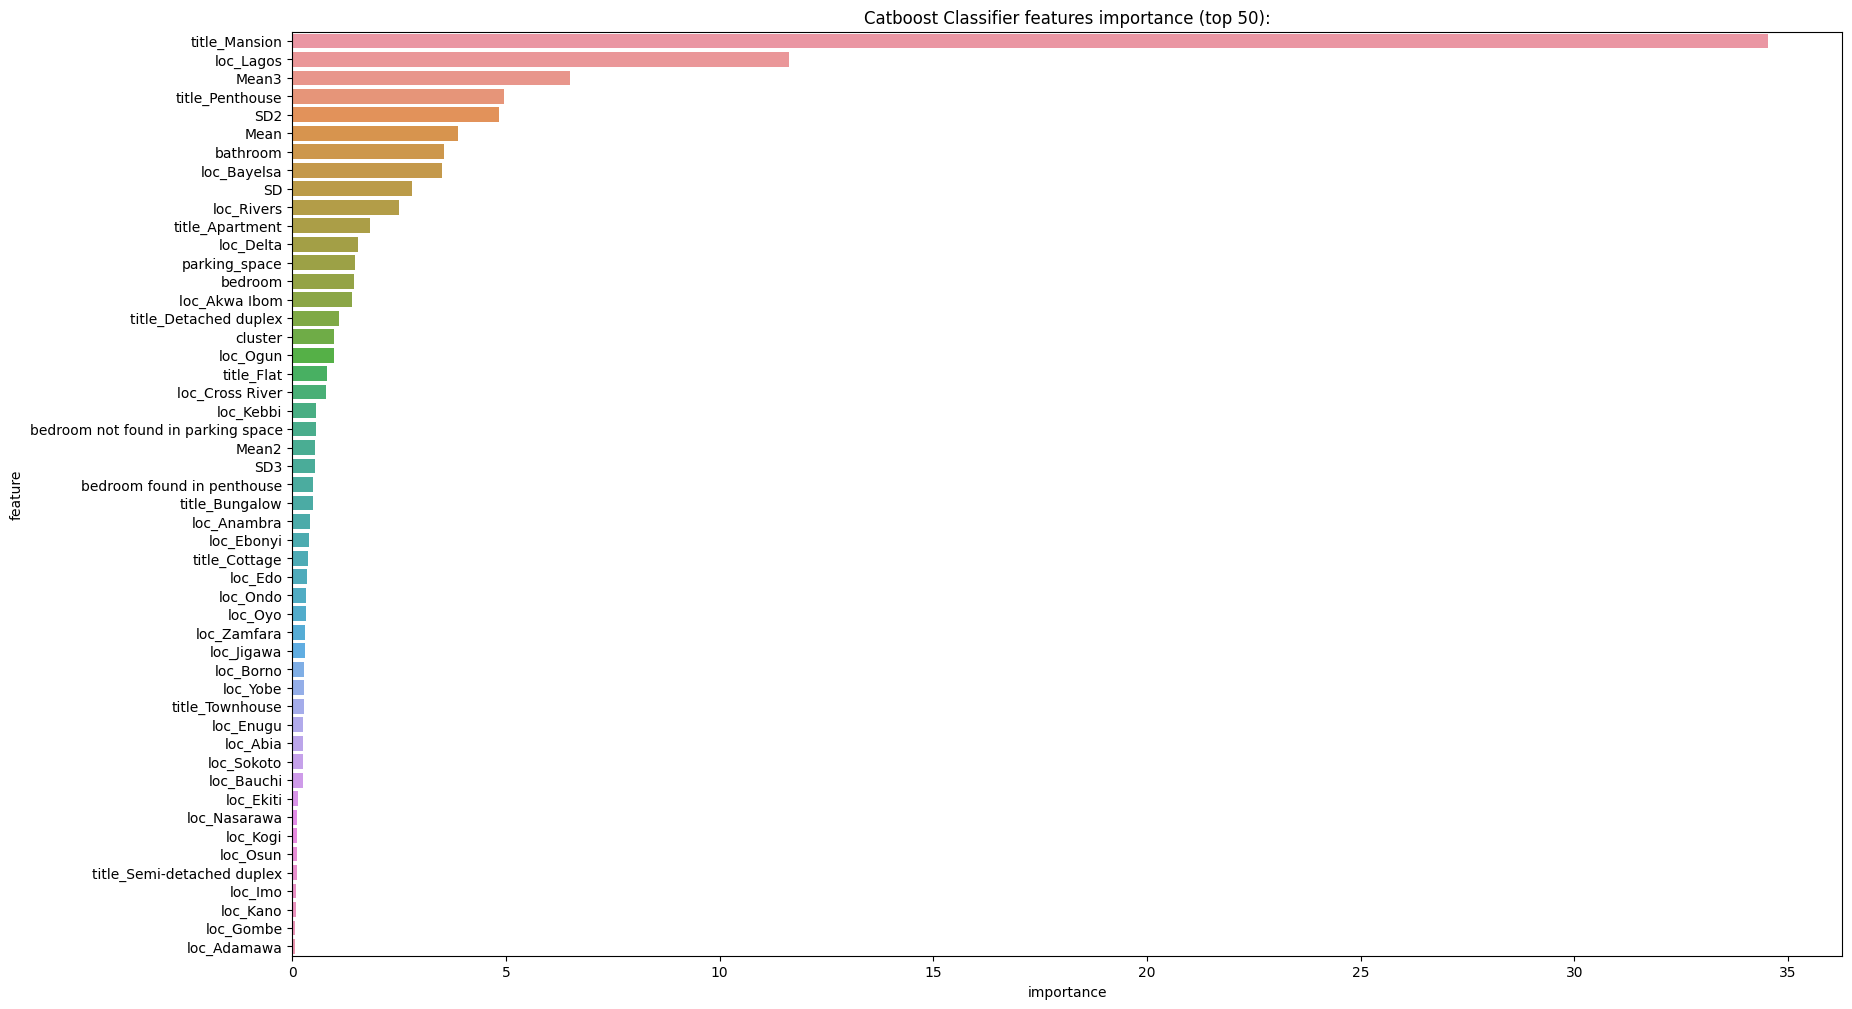

In [13]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance']) #set it into a tabular format
feature_importance_df['feature'] = X_train.columns #Choose columns that will show

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('Catboost Classifier features importance (top 50):');

In [14]:
sub['price'] =  np.mean(fold_pred, axis = 0) #Take the mean of the predictions to get an avaw
sub.tail()

,ID,price
5995,1594,1.704742e+06
5996,2416,1.956338e+06
5997,10195,1.986324e+06
5998,9455,1.319428e+06
5999,11736,3.396145e+06


In [ ]:
sub.to_csv('_VALI_50.csv', index=False) #save as a CSV file